######AdiPokharna
# **Chit 3**

*Problem Statement*:

    Build Feedforward neural networks with Keras and TensorFlow for classification of CIFAR10 image dataset using the following steps:
    a.	Import the necessary packages
    b.	Load the training and testing data
    c.	Define the network architecture using Keras
    d.	Train the model using SGD/Adam optimizer
    e.	Evaluate the network  
    f.	Plot the training loss and accuracy


## a.	Import the necessary packages


In [1]:
import tensorflow as tf

# Display the version
print(tf.__version__)

# other imports
import numpy as np
import matplotlib.pyplot as plt

# Keras Imports
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

2.14.0


## b.	Load the training and testing data


In [2]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [3]:
# cifar10 = tf.keras.datasets.cifar10
# (x_train,y_train),(x_test,y_test)=cifar10.load_data()
# print('before reducing : ',x_train.shape,y_train.shape,x_test.shape,y_test.shape)

# x_train,x_test = x_train/255.0,x_test/255.0
# y_train,y_test=y_train.flatten(),y_test.flatten()

# print('after reducing : ',x_train.shape,y_train.shape,x_test.shape,y_test.shape)

In [4]:
# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()

In [5]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000,) (10000, 32, 32, 3) (10000,)


In [6]:
# fig, ax = plt.subplots(5,5,figsize=(8,8))
# fig.subplots_adjust(hspace=0.5)

# for i in range(5):
#     for j in range(5):
#         index = i * 5 + j
#         ax[i,j].imshow(x_train[index])
#         ax[i,j].set_title(f"{y_train[index]}")
#         ax[i,j].axis('off')
# plt.show()

# fig, ax = plt.subplot(5,5,figsize=(8,8))
# fig.subplots_adjust(hspace=0.5)

# for i in range(5):
#     for j in range(5):
#         index = i*5+j
#         ax[i,j].imshow(x_train[index])
#         ax[i,j].set_title(f"{y_train[index]}")
#         ax[i,j].axis('off')
# plt.show()

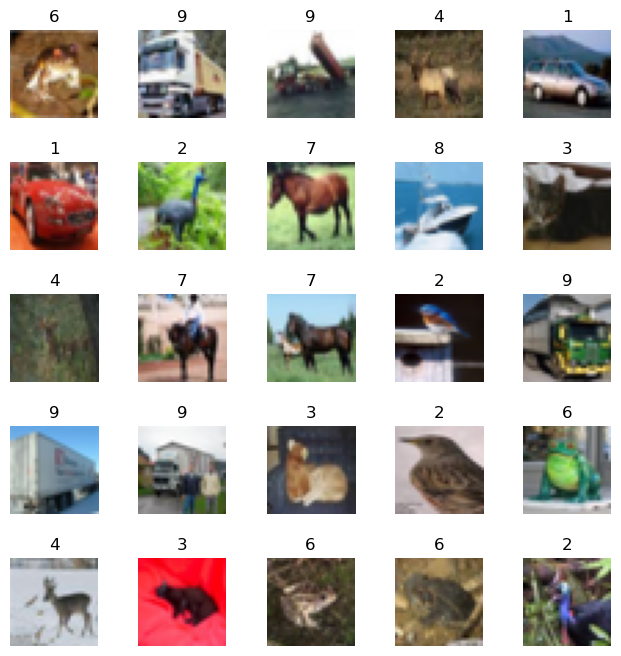

In [7]:
# Visualize data by plotting images
fig, ax = plt.subplots(5, 5, figsize=(8, 8))
fig.subplots_adjust(hspace=0.5)

for i in range(5):
    for j in range(5):
        index = i * 5 + j  # Calculate the index based on the loop variables
        ax[i, j].imshow(x_train[index])
        ax[i, j].set_title(f"{y_train[index]}")
        ax[i, j].axis('off')

plt.show()

In [8]:
# K = len(set(y_train))

# print("class: ",K)

# i = Input(shape=x_train[0].shape)

# x=Conv2D(32,(3,3),activation="relu",padding='same')(i)
# x=BatchNormalization()(x)
# x=Conv2D(32,(3,3),activation='relu',padding='same')(x)
# x=BatchNormalization()(x)
# x=MaxPooling2D((2,2))(x)

# x=Conv2D(64,(3,3),activation='relu',padding='same')(x)
# x = BatchNormalization()(x)
# x=Conv2D(64,(3,3),activation='relu',padding='same')(x)
# x=BatchNormalization()(x)
# x=MaxPooling2D((2,2))(x)

# x=Conv2D(128,(3,3),activation='relu',padding='same')(x)
# x = BatchNormalization()(x)
# x=Conv2D(128,(3,3),activation='relu',padding='same')(x)
# x=BatchNormalization()(x)
# x=MaxPooling2D((2,2))(x)

# x=Flatten()(x)
# x=Dropout(0.2)(x)

# x=Dense(1024,activation='relu')(x)
# x=Dropout(0.2)(x)

# x=Dense(K,activation='softmax')(x)

# model = Model(i,x)
# model.summary()






## c.	Define the network architecture using Keras


In [9]:
# number of classes
K = len(set(y_train))

# calculate total number of classes
# for output layer
print("number of classes:", K)

# Build the model using the functional API
# input layer
i = Input(shape=x_train[0].shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

# model description
model.summary()

number of classes: 10
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16,

## d.	Train the model using SGD/Adam optimizer


In [10]:
# Compile
model.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy'])

In [ ]:
# Fit
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=2)

## e.	Evaluate the network

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

In [ ]:
# test_loss,test_accuracy = model.evaluate(x_test,y_test)
# print(test_loss)

In [ ]:
predictions = model.predict(x_test)

# predictions = model.predict(x_test)

  ## f.	Plot the training loss and accuracy

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()